<a href="https://colab.research.google.com/github/EMPOWER2024/prewebinars/blob/main/RNA_seq_example_differential_expression_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##FROM https://introtogenomics.readthedocs.io/en/latest/2021.11.11.DeseqTutorial.html
# Takes about 10 minutes
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("pasilla")
BiocManager::install("DESeq2")
BiocManager::install("apeglm")
BiocManager::install("DEGreport")
install.packages("pheatmap")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'pasilla'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘UCSC.utils’, ‘GenomeInfoDbData’, ‘abind’, ‘SparseArray’, ‘plogr’, ‘png’, ‘filelock’, ‘XML’, ‘futile.logger’, ‘snow’, ‘BH’, ‘MatrixGenerics’, ‘GenomeInfoDb’, ‘S4Arrays’, ‘DelayedArray’, ‘XVector’, ‘matrixStats’, ‘locfit’, ‘RcppArmadillo’, ‘RSQLite’, ‘KEGGREST’, ‘BiocFileCache’, ‘Biostrings’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘annotate’, ‘BiocParallel’, ‘Biobase’, ‘SummarizedExperiment’, ‘IRanges’, ‘GenomicRanges’, ‘DESeq2’, ‘AnnotationDbi’, ‘S4Vectors’, ‘BiocGenerics’, ‘biomaRt’, ‘hwriter’, ‘Rsamtools’, ‘statmod’, ‘geneplotter

In [ ]:
library("pasilla")
pasCts <- system.file("extdata",
                      "pasilla_gene_counts.tsv",
                      package="pasilla", mustWork=TRUE)
pasAnno <- system.file("extdata",
                       "pasilla_sample_annotation.csv",
                       package="pasilla", mustWork=TRUE)
cts <- as.matrix(read.csv(pasCts,sep="\t",row.names="gene_id"))
coldata <- read.csv(pasAnno, row.names=1)
coldata <- coldata[,c("condition","type")]
coldata$condition <- factor(coldata$condition)
coldata$type <- factor(coldata$type)

Loading required package: DEXSeq

Loading required package: BiocParallel

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SummarizedExperiment

Loading required package: Mat

In [ ]:
# gene raw counts
cts

,untreated1,untreated2,untreated3,untreated4,treated1,treated2,treated3
FBgn0000003,0,0,0,0,0,0,1
FBgn0000008,92,161,76,70,140,88,70
FBgn0000014,5,1,0,0,4,0,0
FBgn0000015,0,2,1,2,1,0,0
FBgn0000017,4664,8714,3564,3150,6205,3072,3334
FBgn0000018,583,761,245,310,722,299,308
FBgn0000022,0,1,0,0,0,0,0
FBgn0000024,10,11,3,3,10,7,5
FBgn0000028,0,1,0,0,0,1,1
FBgn0000032,1446,1713,615,672,1698,696,757


In [ ]:
#metadata
coldata

,condition,type
,<fct>,<fct>
treated1fb,treated,single-read
treated2fb,treated,paired-end
treated3fb,treated,paired-end
untreated1fb,untreated,single-read
untreated2fb,untreated,single-read
untreated3fb,untreated,paired-end
untreated4fb,untreated,paired-end


In [ ]:
rownames(coldata)

[1] "treated1fb"   "treated2fb"   "treated3fb"   "untreated1fb" "untreated2fb"
[6] "untreated3fb" "untreated4fb"

In [ ]:
colnames(cts)

[1] "untreated1" "untreated2" "untreated3" "untreated4" "treated1"  
[6] "treated2"   "treated3"

In [ ]:
# first check if the row names in coldata are the same as the column names of cts data
# Should return the result false
all(rownames(coldata) %in% colnames(cts))

[1] FALSE

In [ ]:
#We need to chop off the "fb" of the row names of coldata, so the naming is consistent.
rownames(coldata) <- sub("fb", "", rownames(coldata))
#check again
all(rownames(coldata) %in% colnames(cts))

[1] TRUE

In [ ]:
#As the names of columns are not in the correct order as given, we need to re-arrange one or the other so that they are consistent in terms of sample order (if we do not, later functions would produce an error).

# check if order is the same
all(rownames(coldata) == colnames(cts))


[1] FALSE

In [ ]:

# reorder cts's columns based on row order of metadata (coldata)
cts <- cts[, rownames(coldata)]
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)
dds

class: DESeqDataSet 
dim: 14599 7 
metadata(1): version
assays(1): counts
rownames(14599): FBgn0000003 FBgn0000008 ... FBgn0261574 FBgn0261575
rowData names(0):
colnames(7): treated1 treated2 ... untreated3 untreated4
colData names(2): condition type

In [ ]:
featureData <- data.frame(gene=rownames(cts))
mcols(dds) <- DataFrame(mcols(dds), featureData)
mcols(dds)

DataFrame with 14599 rows and 1 column
                   gene
            <character>
FBgn0000003 FBgn0000003
FBgn0000008 FBgn0000008
FBgn0000014 FBgn0000014
FBgn0000015 FBgn0000015
FBgn0000017 FBgn0000017
...                 ...
FBgn0261571 FBgn0261571
FBgn0261572 FBgn0261572
FBgn0261573 FBgn0261573
FBgn0261574 FBgn0261574
FBgn0261575 FBgn0261575

In [ ]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [ ]:
dds$condition <- factor(dds$condition, levels = c("untreated","treated"))
dds$condition <- relevel(dds$condition, ref = "untreated")


##About the pasilla dataset
We continue with the pasilla data constructed from the count matrix method above. This data set is from an experiment on Drosophila melanogaster cell cultures and investigated the effect of RNAi knock-down of the splicing factor pasilla (Brooks et al. 2011). The detailed transcript of the production of the pasilla data is provided in the vignette of the data package pasilla

##Differential expression analysis
The standard differential expression analysis steps are wrapped into a single function, DESeq. The estimation steps performed by this function are described below, in the manual page for ?DESeq and in the Methods section of the DESeq2 publication (Love, Huber, and Anders 2014).

Results tables are generated using the function results, which extracts a results table with log2 fold changes, p values and adjusted p values. With no additional arguments to results, the log2 fold change and Wald test p value will be for the last variable in the design formula, and if this is a factor, the comparison will be the last level of this variable over the reference level (see previous note on factor levels). However, the order of the variables of the design do not matter so long as the user specifies the comparison to build a results table for, using the name or contrast arguments of results.

Details about the comparison are printed to the console, directly above the results table. The text, condition treated vs untreated, tells you that the estimates are of the logarithmic fold change log2(treated/untreated).

In its simplest view, differential expression analysis test for differences between 2 or more groups when we have one or more factors that could contribute to the observed differences. However, in transcriptomic data, we often have a much lower number of replicates, data are not normally distributed, and we are testing differences in many genes at the same time. Methods and tools for analysing differential gene expression; therefore, have some specific terminology and concepts as we shall see next!

##Genes differentially expressed between conditions
Using the DESeq dds object we created earlier, we can look at the differentially expressed genes using results() function. By default, DESeq2 perform pair-wise comparison of the first and the last variable in the experimental design variables and provide a result table.

In [ ]:
## probably the most important command :)
dds <- DESeq(dds)

res <- results(dds)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition treated vs untreated 
Wald test p-value: condition treated vs untreated 
DataFrame with 9921 rows and 6 columns
              baseMean log2FoldChange     lfcSE       stat    pvalue      padj
             <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
FBgn0000008   95.14429     0.00227644  0.223729   0.010175 0.9918817  0.997211
FBgn0000014    1.05652    -0.49512039  2.143186  -0.231021 0.8172987        NA
FBgn0000017 4352.55357    -0.23991894  0.126337  -1.899041 0.0575591  0.288002
FBgn0000018  418.61048    -0.10467391  0.148489  -0.704927 0.4808558  0.826834
FBgn0000024    6.40620     0.21084779  0.689588   0.305759 0.7597879  0.943501
...                ...            ...       ...        ...       ...       ...
FBgn0261570 3208.38861      0.2955329  0.127350  2.3206264  0.020307  0.144240
FBgn0261572    6.19719     -0.9588230  0.775315 -1.2366888  0.216203  0.607848
FBgn0261573 2240.97951      0.0127194  0.113300  0.1122634  0.91

In [ ]:
res = res[order(res$pvalue, decreasing = F),]
head(res) #let's look at the results table

log2 fold change (MLE): condition treated vs untreated 
Wald test p-value: condition treated vs untreated 
DataFrame with 6 rows and 6 columns
             baseMean log2FoldChange     lfcSE      stat       pvalue
            <numeric>      <numeric> <numeric> <numeric>    <numeric>
FBgn0039155   730.568       -4.61874 0.1691240  -27.3098 3.24446e-164
FBgn0025111  1501.448        2.89995 0.1273576   22.7701 9.07164e-115
FBgn0029167  3706.024       -2.19691 0.0979154  -22.4368 1.72030e-111
FBgn0003360  4342.832       -3.17954 0.1435677  -22.1466 1.12417e-108
FBgn0035085   638.219       -2.56024 0.1378126  -18.5777  4.86844e-77
FBgn0039827   261.911       -4.16243 0.2325942  -17.8957  1.27484e-71
                    padj
               <numeric>
FBgn0039155 2.71918e-160
FBgn0025111 3.80147e-111
FBgn0029167 4.80594e-108
FBgn0003360 2.35542e-105
FBgn0035085  8.16049e-74
FBgn0039827  1.78075e-68

##Plot some of the top genes

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DEGreport")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.1 (2024-06-14)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DEGreport'”
Old packages: 'nlme'



No genes were mapped to rowData. check ann parameter values.

Using gene as id variables

`geom_smooth()` using formula = 'y ~ x'


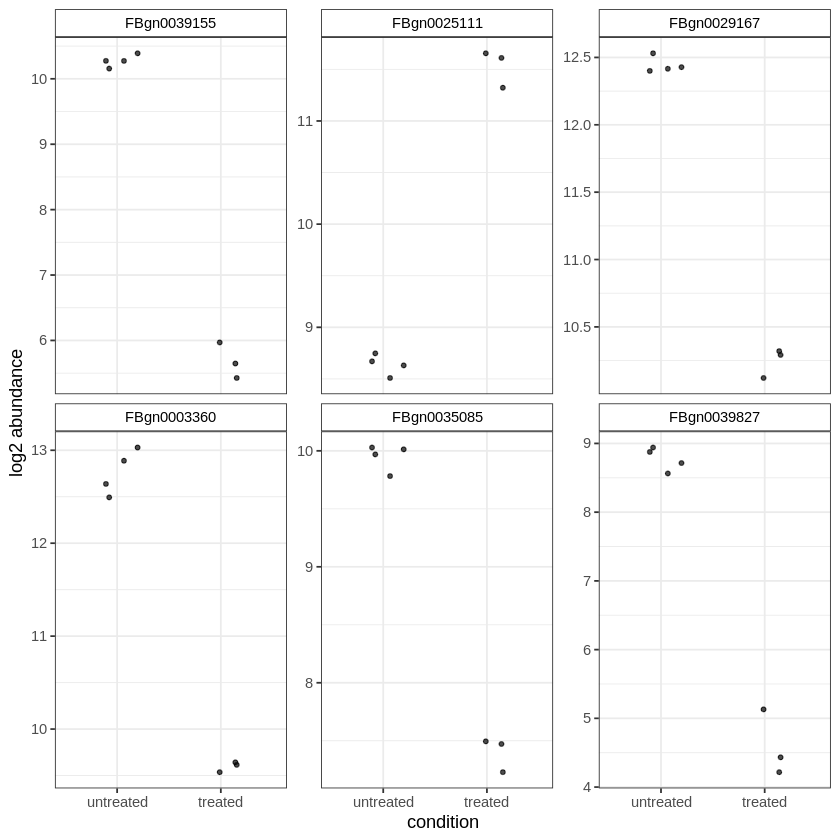

In [ ]:
DEGreport::degPlot(dds = dds, res = res, n = 6, xs = "condition")